Course Number: INF2178
Student Name: Xuying DU
Project: Assignment 3

In [1]:
import pandas as pd
%pip install dfply
from dfply import *
import seaborn as sns
import matplotlib.pyplot as plt
%pip install pingouin
from pingouin import ancova
import numpy as np
from pingouin import ancova
import statsmodels.api as sm
from statsmodels.formula.api import ols

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
df=pd.read_csv("./INF2178_A3_data.csv")
df.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,2
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,3
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,3
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,3


In [3]:
# summary statistics for dependent variable yield
df >> group_by(X.incomegroup) >> summarize(n=X['springgeneralknowledgescore'].count(),
                                           mean=X['springgeneralknowledgescore'].mean(),
                                           std=X['springgeneralknowledgescore'].std())



,incomegroup,n,mean,std
0,1,4729,25.069492,7.248229
1,2,3726,29.143605,6.965300
2,3,3478,31.567718,6.928347


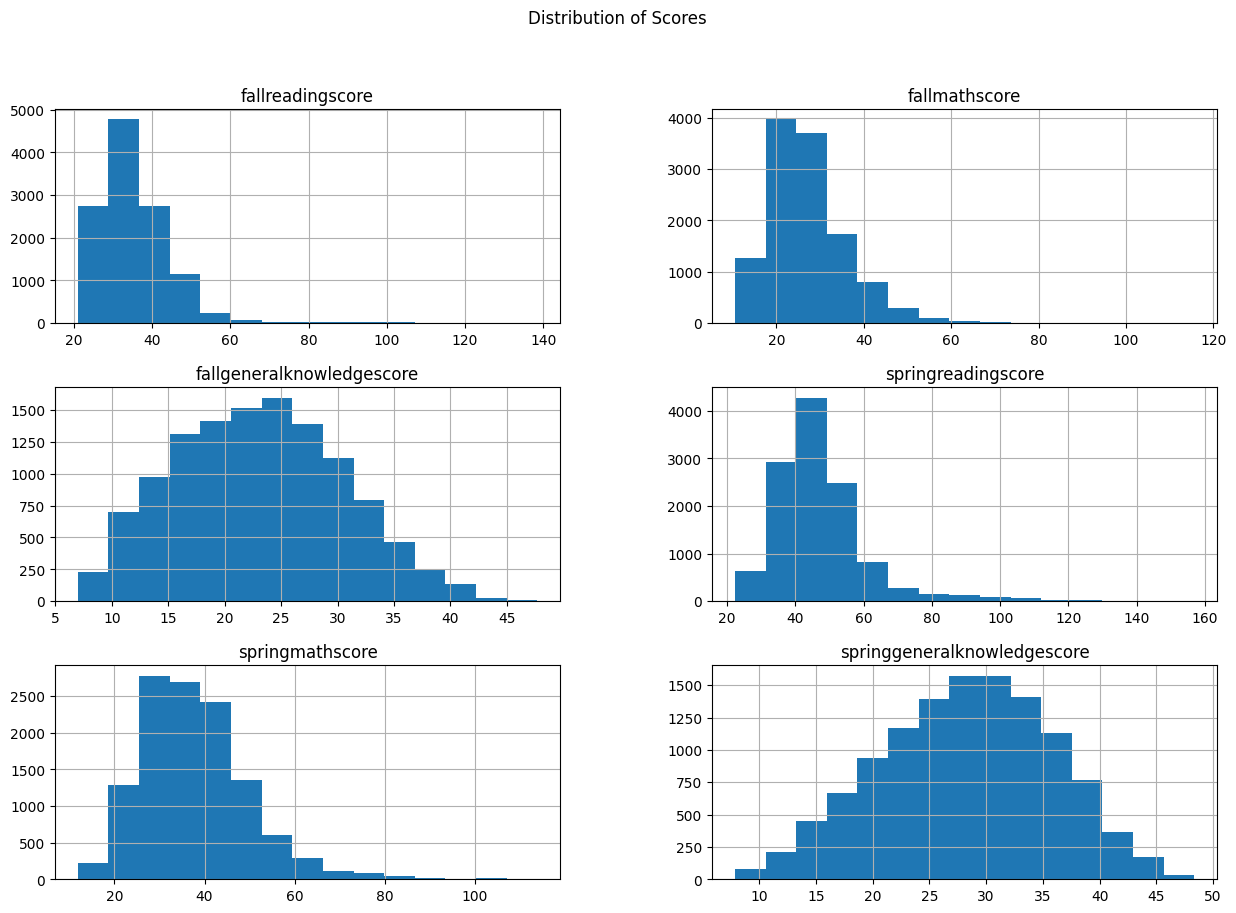

In [4]:
# Distribution plots for scores
df[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
    'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Scores')
plt.show()


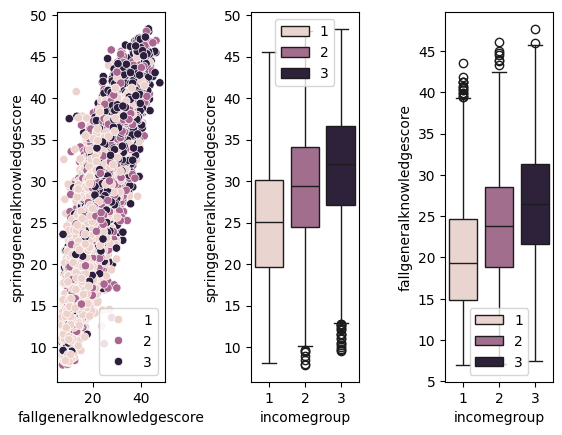

In [5]:
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(wspace=0.8)
#Scatter Plot:
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="springgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[0])
#Box Plot for Spring General Knowledge Scores:
sns.boxplot(data=df, x="incomegroup", y="springgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[1])
#Box Plot for Fall General Knowledge Scores:
sns.boxplot(data=df, x="incomegroup", y="fallgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[2])
plt.show()

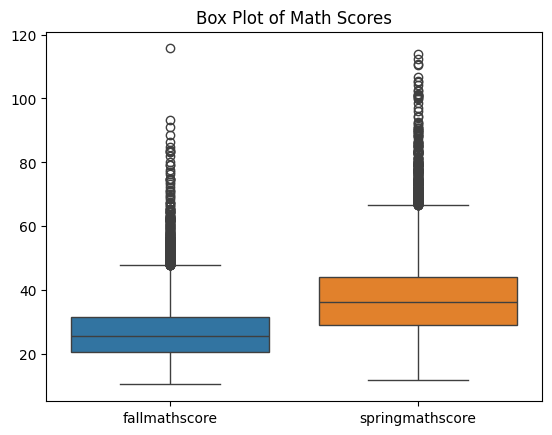

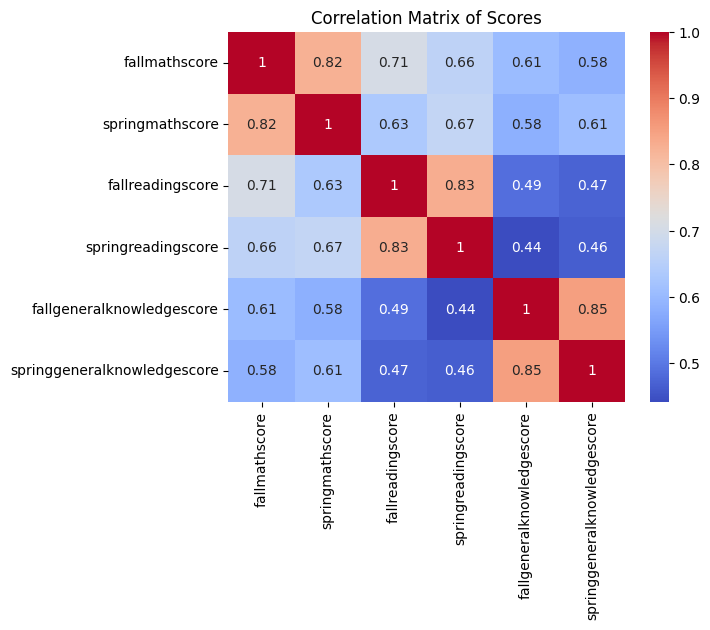

In [6]:
# Box plot for math scores to check for outliers
sns.boxplot(data=df[['fallmathscore', 'springmathscore']])
plt.title('Box Plot of Math Scores')
plt.show()

# Correlation matrix
correlation_matrix = df[['fallmathscore', 'springmathscore', 'fallreadingscore', 'springreadingscore',
                         'fallgeneralknowledgescore', 'springgeneralknowledgescore']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Scores')
plt.show()

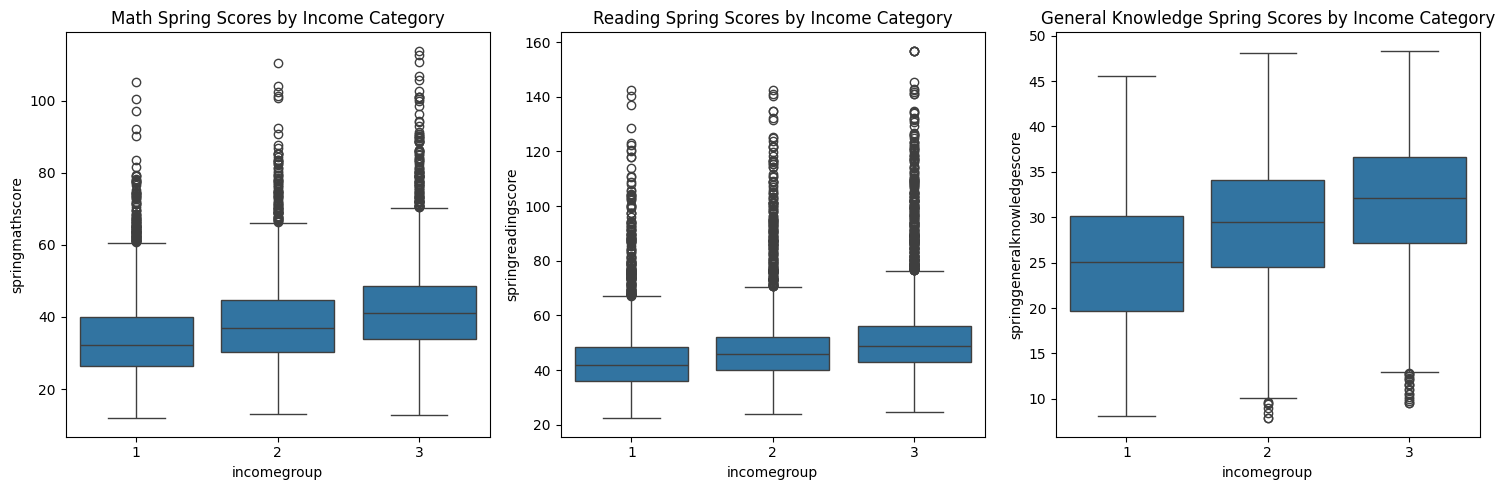

In [7]:
# Set subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plot of spring math scores by income category
sns.boxplot(x='incomegroup', y='springmathscore', data=df, ax=axes[0])
axes[0].set_title('Math Spring Scores by Income Category')

# Box plot of reading scores
sns.boxplot(x='incomegroup', y='springreadingscore', data=df, ax=axes[1])
axes[1].set_title('Reading Spring Scores by Income Category')

# Box plot of general knowledge scores
sns.boxplot(x='incomegroup', y='springgeneralknowledgescore', data=df, ax=axes[2])
axes[2].set_title('General Knowledge Spring Scores by Income Category')

# Adjust the subplot layout to prevent overlapping
plt.tight_layout()
plt.show()


In [8]:
#Shapiro-Wilk tests to examine normal distribution.
from scipy.stats import shapiro

for group in df['incomegroup'].unique():
    group_data = df[df['incomegroup'] == group]['springmathscore']
    w_stat, p_value = shapiro(group_data)
    print(f"Income group {group}: Shapiro-Wilk test statistic = {w_stat}, p-value = {p_value}")

for group in df['incomegroup'].unique():
    group_data = df[df['incomegroup'] == group]['springreadingscore']
    w_stat, p_value = shapiro(group_data)
    print(f"Income group {group}: Shapiro-Wilk test statistic = {w_stat}, p-value = {p_value}")

for group in df['incomegroup'].unique():
    group_data = df[df['incomegroup'] == group]['springgeneralknowledgescore']
    w_stat, p_value = shapiro(group_data)
    print(f"Income group {group}: Shapiro-Wilk test statistic = {w_stat}, p-value = {p_value}")

Income group 3: Shapiro-Wilk test statistic = 0.9375684261322021, p-value = 5.926055242705863e-36
Income group 2: Shapiro-Wilk test statistic = 0.9444584846496582, p-value = 2.475346590823217e-35
Income group 1: Shapiro-Wilk test statistic = 0.9493666291236877, p-value = 1.3623508869112503e-37
Income group 3: Shapiro-Wilk test statistic = 0.7968617677688599, p-value = 0.0
Income group 2: Shapiro-Wilk test statistic = 0.8267481923103333, p-value = 0.0
Income group 1: Shapiro-Wilk test statistic = 0.8592000603675842, p-value = 0.0
Income group 3: Shapiro-Wilk test statistic = 0.9891247749328613, p-value = 1.0870892842862207e-15
Income group 2: Shapiro-Wilk test statistic = 0.994621217250824, p-value = 1.691508322299029e-10
Income group 1: Shapiro-Wilk test statistic = 0.9943889379501343, p-value = 1.2948034571608202e-12


In [9]:
# Calculate score changes
df['math_score_change'] = df['springmathscore'] - df['fallmathscore']
df['reading_score_change'] = df['springreadingscore'] - df['fallreadingscore']


                            OLS Regression Results                            
Dep. Variable:      math_score_change   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                        20:13:51   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11929   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

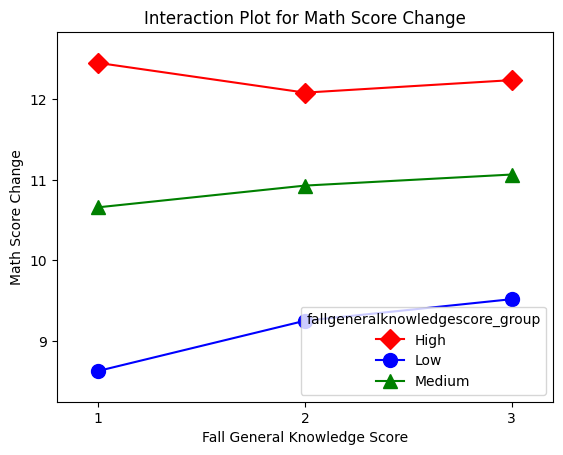

In [10]:
# Fit ANCOVA model for math score change without interaction term
model_math = sm.formula.ols('math_score_change ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()
# Print model summary
print(model_math.summary())

# Fit ANCOVA model for math score change with interaction term
model_interaction_math = sm.formula.ols('math_score_change ~ C(incomegroup) * fallgeneralknowledgescore', data=df).fit()
# Print model summary
print(model_interaction_math.summary())

#interaction plot
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

df['incomegroup_str'] = df['incomegroup'].astype(str)
df['fallgeneralknowledgescore_group'] = pd.qcut(df['fallgeneralknowledgescore'], q=3, labels=['Low', 'Medium', 'High']).astype(str)
fig = interaction_plot(x=df['incomegroup_str'],
                       trace=df['fallgeneralknowledgescore_group'],
                       response=df['math_score_change'],
                       colors=['red', 'blue', 'green'],
                       markers=['D', 'o', '^'], ms=10)
plt.title('Interaction Plot for Math Score Change')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Math Score Change')
plt.show()

In [11]:
df['incomegroup_str'].unique()

array(['3', '2', '1'], dtype=object)

In [12]:
df['fallgeneralknowledgescore'].unique()

array([33.822, 38.147, 28.108, ..., 23.342, 22.788, 15.256])

In [13]:
df['math_score_change'].unique()

array([10.56, 14.49,  4.24, ..., 15.13, -1.41, 14.62])

                             OLS Regression Results                             
Dep. Variable:     reading_score_change   R-squared:                       0.032
Model:                              OLS   Adj. R-squared:                  0.032
Method:                   Least Squares   F-statistic:                     133.5
Date:                  Sat, 23 Mar 2024   Prob (F-statistic):           4.50e-85
Time:                          20:14:00   Log-Likelihood:                -41675.
No. Observations:                 11933   AIC:                         8.336e+04
Df Residuals:                     11929   BIC:                         8.339e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

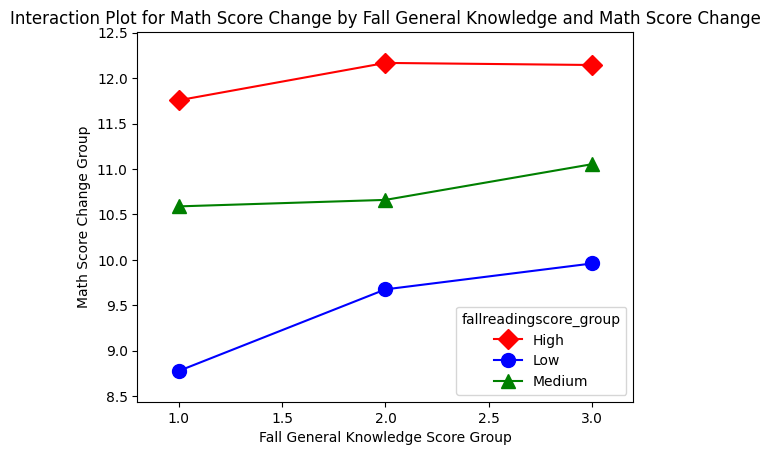

In [14]:
# Fit ANCOVA model for reading score change without interaction term
model_reading = sm.formula.ols('reading_score_change ~ C(incomegroup) + fallreadingscore', data=df).fit()
# Print model summary
print(model_reading.summary())

# Fit ANCOVA model for reading score change with interaction term
model_interaction_reading = sm.formula.ols('reading_score_change ~ C(incomegroup) * fallreadingscore', data=df).fit()
# Print model summary
print(model_interaction_reading.summary())

# Grouping by the 25th percentile
df['fallreadingscore_group'] = pd.qcut(df['fallreadingscore'], q=3, labels=['Low', 'Medium', 'High']).astype(str)
# df['reading_score_change_group'] = pd.qcut(df['reading_score_change'], q=3, labels=['Decrease', 'No Change', 'Increase']).astype(str)


# Plotting interaction plots
fig = interaction_plot(x=df['incomegroup'],
                       trace=df['fallreadingscore_group'],
                       response=df['math_score_change'],
                       colors=['red', 'blue', 'green'],
                       markers=['D', 'o', '^'], ms=10)
plt.title('Interaction Plot for Math Score Change by Fall General Knowledge and Math Score Change')
plt.xlabel('Fall General Knowledge Score Group')
plt.ylabel('Math Score Change Group')
plt.show()

In [15]:
df.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup,math_score_change,reading_score_change,incomegroup_str,fallgeneralknowledgescore_group,fallreadingscore_group
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,10.56,12.79,3,High,Medium
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,14.49,32.68,3,High,High
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,4.24,-0.27,3,High,High
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,11.68,1.57,2,Low,Medium
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,3.95,0.86,2,Low,Medium
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3,17.04,13.68,3,High,High
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,2,8.27,6.03,2,Medium,Medium
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,3,5.37,3.42,3,High,Medium
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,3,12.53,18.69,3,High,High
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,3,5.17,5.67,3,High,Medium


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Math Score Change (No Interaction) - Shapiro-Wilk test: W=0.9664044380187988, p-value=0.0
Math Score Change (With Interaction) - Shapiro-Wilk test: W=0.9662739038467407, p-value=0.0
Reading Score Change (No Interaction) - Shapiro-Wilk test: W=0.9119972586631775, p-value=0.0
Reading Score Change (With Interaction) - Shapiro-Wilk test: W=0.9124301075935364, p-value=0.0
Math Score Change - Levene's Test: Stat=nan, p-value=nan
Reading Score Change - Levene's Test: Stat=nan, p-value=nan


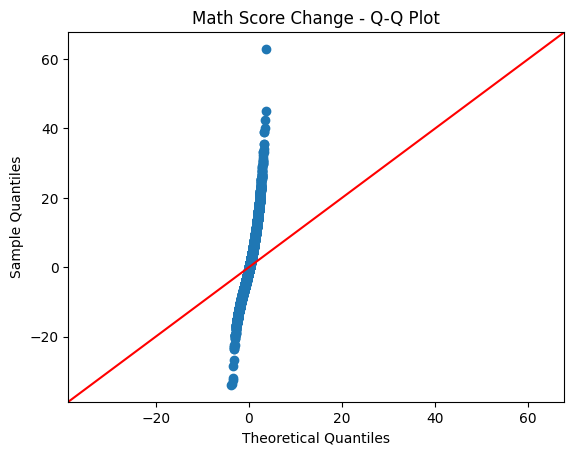

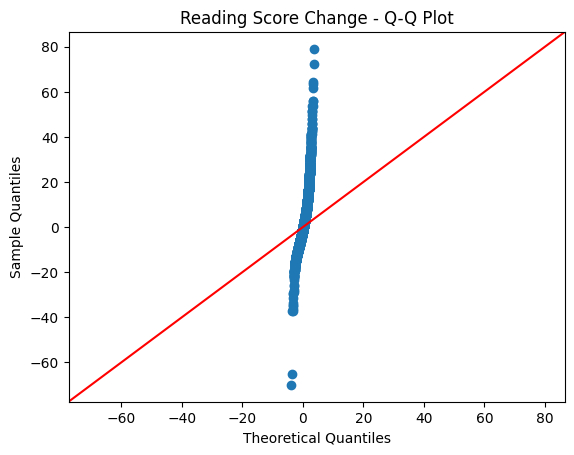

In [16]:
from scipy import stats
# Shapiro-Wilk Test for Normality of Residuals
# Math Score Change Model (Without interaction term)
w, pvalue = stats.shapiro(model_math.resid)
print(f"Math Score Change (No Interaction) - Shapiro-Wilk test: W={w}, p-value={pvalue}")

# Math Score Change Model (With interaction term)
w, pvalue = stats.shapiro(model_interaction_math.resid)
print(f"Math Score Change (With Interaction) - Shapiro-Wilk test: W={w}, p-value={pvalue}")

# Reading Score Change Model (Without interaction term)
w, pvalue = stats.shapiro(model_reading.resid)
print(f"Reading Score Change (No Interaction) - Shapiro-Wilk test: W={w}, p-value={pvalue}")

# Reading Score Change Model (With interaction term)
w, pvalue = stats.shapiro(model_interaction_reading.resid)
print(f"Reading Score Change (With Interaction) - Shapiro-Wilk test: W={w}, p-value={pvalue}")

# Levene's Test for Homogeneity of Variances
# math score change
stat, pvalue = stats.levene(df['math_score_change'][df['incomegroup'] == 'Low'],
                            df['math_score_change'][df['incomegroup'] == 'Medium'],
                            df['math_score_change'][df['incomegroup'] == 'High'])
print(f"Math Score Change - Levene's Test: Stat={stat}, p-value={pvalue}")

# reading score change
stat, pvalue = stats.levene(df['reading_score_change'][df['incomegroup'] == 'Low'],
                            df['reading_score_change'][df['incomegroup'] == 'Medium'],
                            df['reading_score_change'][df['incomegroup'] == 'High'])
print(f"Reading Score Change - Levene's Test: Stat={stat}, p-value={pvalue}")

# Visual check of normality using Q-Q plots
sm.qqplot(model_math.resid, line='45')
plt.title("Math Score Change - Q-Q Plot")
plt.show()

sm.qqplot(model_reading.resid, line='45')
plt.title("Reading Score Change - Q-Q Plot")
plt.show()


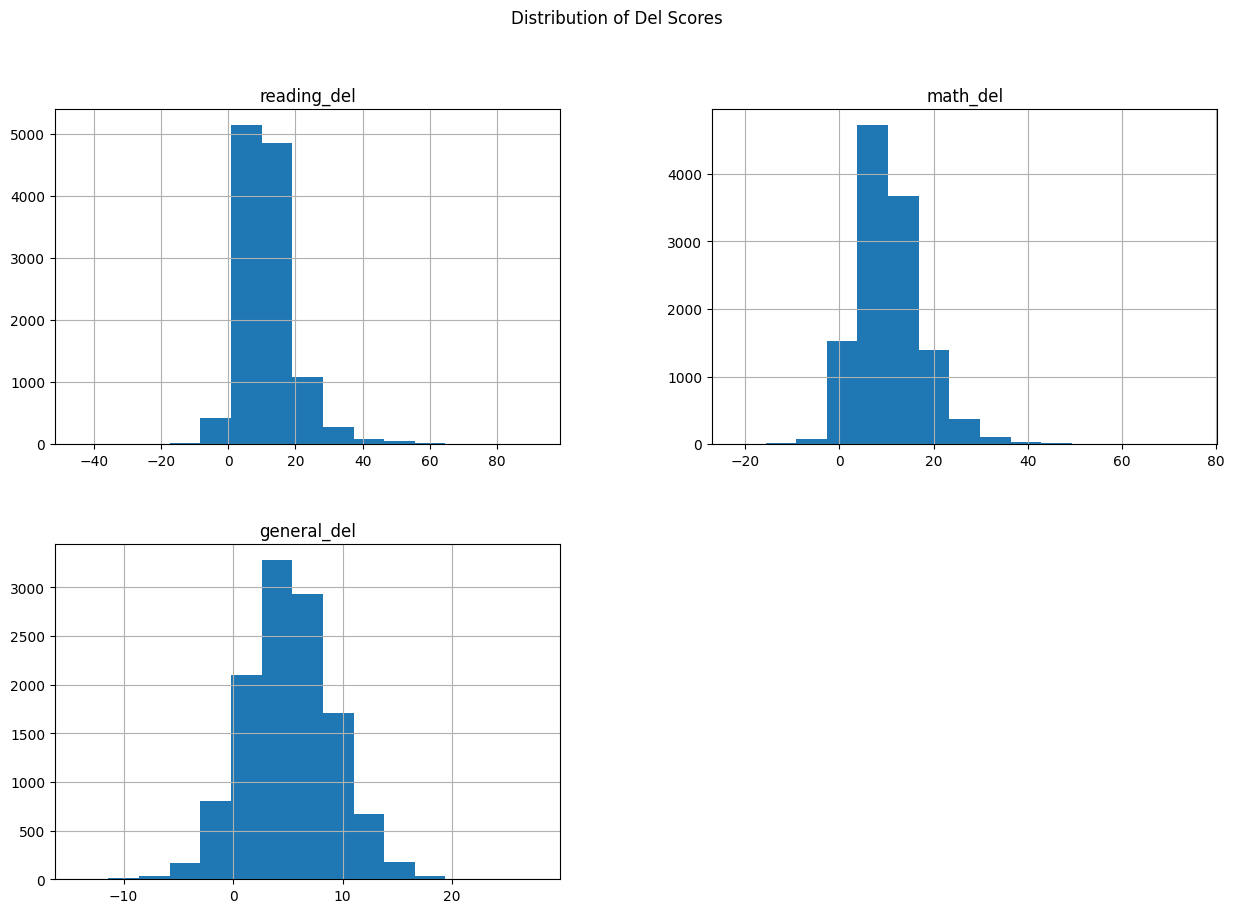

In [17]:
#plot histograms to visualize the distribution of score changes for each subject
df["reading_del"] = df["springreadingscore"] - df["fallreadingscore"]
df["math_del"] = df["springmathscore"] - df["fallmathscore"]
df["general_del"] = df["springgeneralknowledgescore"] - df["fallgeneralknowledgescore"]

df[["reading_del", "math_del", "general_del"]].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Del Scores')
plt.show()

In [18]:
# Fit ANCOVA model for general knowledge score change without interaction term, controlling for reading score change
model_general_reading = sm.formula.ols('general_del ~ C(incomegroup) + reading_del', data=df).fit()
# Print model summary
print(model_general_reading.summary())

# Fit ANCOVA model for general knowledge score change without interaction term, controlling for math score change
model_general_math = sm.formula.ols('general_del ~ C(incomegroup) + math_del', data=df).fit()
# Print model summary
print(model_general_math.summary())

# Fit ANCOVA model for math score change without interaction term, controlling for reading score change
model_math_reading = sm.formula.ols('math_del ~ C(incomegroup) + reading_del', data=df).fit()
# Print model summary
print(model_math_reading.summary())

                            OLS Regression Results                            
Dep. Variable:            general_del   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     58.57
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           1.40e-37
Time:                        20:14:24   Log-Likelihood:                -33550.
No. Observations:               11933   AIC:                         6.711e+04
Df Residuals:                   11929   BIC:                         6.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.4682    

In [19]:
# Shapiro-Wilk Test for Normality of Residuals
# For general knowledge score change controlling for reading score change
w, pvalue = stats.shapiro(model_general_reading.resid)
print(f"General Knowledge Score Change (Controlling for Reading) - Shapiro-Wilk test: W={w}, p-value={pvalue}")

# For general knowledge score change controlling for math score change
w, pvalue = stats.shapiro(model_general_math.resid)
print(f"General Knowledge Score Change (Controlling for Math) - Shapiro-Wilk test: W={w}, p-value={pvalue}")

# For math score change controlling for reading score change
w, pvalue = stats.shapiro(model_math_reading.resid)
print(f"Math Score Change (Controlling for Reading) - Shapiro-Wilk test: W={w}, p-value={pvalue}")

# Levene's Test for Homogeneity of Variances
# You should replace 'general_del' with the specific dependent variable in your model
stat, pvalue = stats.levene(
    df['general_del'][df['incomegroup'] == 'Low'],
    df['general_del'][df['incomegroup'] == 'Medium'],
    df['general_del'][df['incomegroup'] == 'High']
)
print(f"General Knowledge Score Change - Levene's Test: Statistic={stat}, p-value={pvalue}")

General Knowledge Score Change (Controlling for Reading) - Shapiro-Wilk test: W=0.996810793876648, p-value=2.1674131046644845e-15
General Knowledge Score Change (Controlling for Math) - Shapiro-Wilk test: W=0.9971548318862915, p-value=2.3886545953005767e-14
Math Score Change (Controlling for Reading) - Shapiro-Wilk test: W=0.9651268124580383, p-value=0.0
General Knowledge Score Change - Levene's Test: Statistic=nan, p-value=nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


                            OLS Regression Results                            
Dep. Variable:            general_del   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     86.08
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           3.30e-72
Time:                        20:14:30   Log-Likelihood:                -33467.
No. Observations:               11933   AIC:                         6.694e+04
Df Residuals:                   11928   BIC:                         6.698e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.9479    

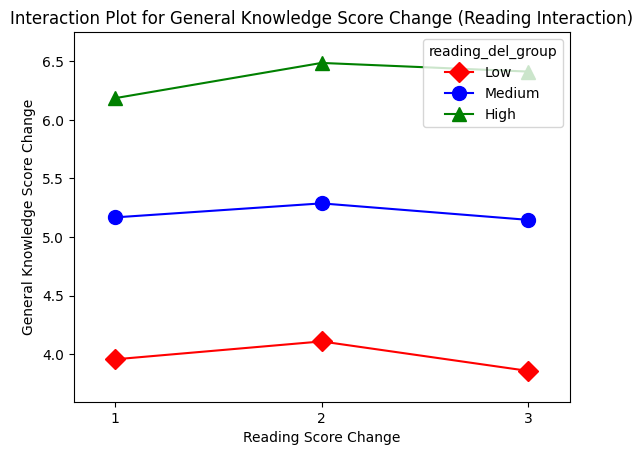

In [20]:
# Fit ANCOVA model for general knowledge score change, controlling for both reading and math score change, without interaction term
model_general_both = sm.formula.ols('general_del ~ C(incomegroup) + reading_del + math_del', data=df).fit()
print(model_general_both.summary())

# Fit ANCOVA model for general knowledge score change, controlling for both reading and math score change, with interaction terms
model_general_interaction = sm.formula.ols('general_del ~ C(incomegroup) * reading_del + C(incomegroup) * math_del', data=df).fit()
print(model_general_interaction.summary())

df['interaction_reading'] = df['reading_del'] * df['incomegroup']

# Create a new column to represent the grouping of reading score changes
df['reading_del_group'] = pd.cut(df['reading_del'], bins=3, labels=['Low', 'Medium', 'High'])

#interaction plot
fig = interaction_plot(x=df['incomegroup_str'],
                       trace=df['reading_del_group'],
                       response=df['general_del'],
                       colors=['red', 'blue', 'green'],
                       markers=['D', 'o', '^'], ms=10)
plt.title('Interaction Plot for General Knowledge Score Change (Reading Interaction)')
plt.xlabel('Reading Score Change')
plt.ylabel('General Knowledge Score Change')
plt.show()